# **Digital Advertising Conversion Fraud Detection**

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading Datasets**

In [2]:
# Reading Training Data set
Data =pd.read_csv(r'Data\Training Data.csv')

print('Shape of Data:',Data.shape)
Data.head()

Shape of Data: (965, 56)


,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,...,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,...,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,NaN,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN,True


In [3]:
# Reading Testing Data set
Test_Data =pd.read_csv(r'Data\Test Data.csv')

print('Shape of Traning Data:',Test_Data.shape)

Shape of Traning Data: (455, 56)


In [4]:
# Check the Column Names
Data.columns

Index(['clientid_cr', 'clmbuserid_cr', 'conversiontime_cr', 'imprid_cr',
       'adslotdimid_cr', 'algo_cr', 'audiences_cr', 'clickbid_cr',
       'geodimid_cr', 'ip_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'position_cr',
       'pubclientid_cr', 'refurl_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'time_cr', 'adLogType_cr', 'v_cr', 'allAudiences_cr',
       'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'modelDimId_cr', 'lookUpFrom_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'goalTypeId_cr', 'conversionDurationInMillis_cr',
       'impressionTimeInMillis_cr', 'clickTimeInMillis_cr', 'osVerDimId_cr',
       'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr', 'deviceId_cr',
       'uvh_cr', 'uv_cr', 'platformId_cr', 'sdkVersion_cr', 'usrClusterId_cr',
       'cityGrpDimId_cr', 'siteClusterIds_cr', 'refClusterId_cr', 'paid_cr',
       'spend_cr', 'attributionType_cr', 'conversionid_cr', 'optimize_on_cr',
       'bundleId_cr

In [5]:
# Check the values of Conversion fraud
Data['conversion_fraud'].value_counts()

False    834
True     131
Name: conversion_fraud, dtype: int64

### **Descriptive Statistics**

In [6]:
# Descriptive Statistics
Data.describe()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,...,deviceId_cr,uvh_cr,uv_cr,platformId_cr,cityGrpDimId_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,bundleId_cr
count,965.000000,9.650000e+02,965.000000,945.000000,669.000000,965.000000,9.650000e+02,9.650000e+02,9.450000e+02,965.000000,...,111.000000,0.0,2.900000e+01,112.000000,621.000000,66.000000,194.0,194.000000,194.0,5.000000e+00
mean,62726.958549,1.620000e+12,287159.814508,137.262434,3.512760,475.873575,5.527204e+06,5.020330e+07,2.125528e+07,24496.811399,...,195443.135135,NaN,4.690162e+07,1.473214,348007.040258,282461.924242,1.0,526.572165,1.0,5.326108e+07
std,25456.725592,0.000000e+00,82452.398233,1687.530948,2.767035,10224.336657,1.175546e+05,4.804771e+06,6.460267e+07,31611.018560,...,6337.400909,NaN,6.353218e+06,0.643188,1.557497,82371.424050,0.0,343.800351,0.0,9.673626e+05
min,802.000000,1.620000e+12,129117.000000,1.000000,0.900000,144.000000,3.238328e+06,2.050601e+07,0.000000e+00,1.000000,...,129276.000000,NaN,3.239636e+07,1.000000,348005.000000,128515.000000,1.0,160.000000,1.0,5.181866e+07
25%,64588.000000,1.620000e+12,233531.000000,18.000000,2.790000,144.000000,5.488773e+06,4.950416e+07,1.000000e+00,2501.000000,...,196041.000000,NaN,4.286078e+07,1.000000,348006.000000,257716.000000,1.0,275.000000,1.0,5.269602e+07
50%,75694.000000,1.620000e+12,332775.000000,33.000000,2.790000,144.000000,5.488773e+06,4.950416e+07,1.000000e+00,15240.000000,...,196047.000000,NaN,4.286402e+07,1.000000,348007.000000,333499.000000,1.0,450.000000,1.0,5.393023e+07
75%,75694.000000,1.620000e+12,355670.000000,38.000000,3.100000,144.000000,5.597863e+06,5.318289e+07,2.000000e+00,16211.000000,...,196047.000000,NaN,5.421004e+07,2.000000,348008.000000,333731.500000,1.0,750.000000,1.0,5.393023e+07
max,86555.000000,1.620000e+12,360638.000000,26006.000000,21.942000,317759.000000,5.620639e+06,5.393064e+07,8.157052e+08,85030.000000,...,196047.000000,NaN,5.423576e+07,3.000000,348010.000000,333737.000000,1.0,1700.000000,1.0,5.393025e+07


In [7]:
# Descriptive Statistics for categorical data
Data.describe(include='object')

,clmbuserid_cr,imprid_cr,audiences_cr,ip_cr,refurl_cr,allAudiences_cr,connTypeDimId_cr,sdkVersion_cr,usrClusterId_cr,siteClusterIds_cr,conversionid_cr,optimize_on_cr
count,965,965,766,945,840,918,945,7,354,412,24,40
unique,896,934,440,1,399,820,9,3,195,54,5,1
top,3e41e6f2-bbec-4ed2-9714-2a975655ad8a-23by1,54c285f5-8766-404c-ae65-c63d32f47eee-23by0,"8kv,2vk,8gw,2vl",XXX.XXX.XXX.XXX,https%3A%2F%2Fwww.olx.in%2F,"hkf,9nj,5xq",264494,aos:5.3.0,333496,"333,734,128,527,333,000",54c285f5-8766-404c-ae65-c63d32f47eee-23by0,True
freq,20,20,110,945,121,24,427,3,33,163,20,40


## **Data Cleaning**

In [8]:
# Check Missing Values in features
Data.isnull().sum()

clientid_cr                        0
clmbuserid_cr                      0
conversiontime_cr                  0
imprid_cr                          0
adslotdimid_cr                     0
algo_cr                           20
audiences_cr                     199
clickbid_cr                      296
geodimid_cr                        0
ip_cr                             20
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                       20
pubclientid_cr                     0
refurl_cr                        125
siteId_cr                          0
templateid_cr                    107
goalid_cr                          0
time_cr                            0
adLogType_cr                       0
v_cr                               1
allAudiences_cr                   47
pricingtype_cr                     0
osId_cr                           21
browserId_cr                      21
cityId_cr                         20
stateId_cr                        20
m

In [9]:
# Sort rows with Maximum Missing Values
Data.isnull().sum(axis=1).sort_values(ascending=False)

515    33
518    33
507    33
508    33
509    33
       ..
206     9
588     9
422     9
309     8
777     7
Length: 965, dtype: int64

In [10]:
# Check how many rows have missing values more than 16
print(Data.shape)
Data[Data.isnull().sum(axis=1)>16].shape

(965, 56)


(31, 56)

In [11]:
# Delete rows with more than 16 missing values rows

print('Shape before deleting rows',Data.shape)

Data=Data[Data.isnull().sum(axis=1)<=16]

print('Shape after deleting rows',Data.shape)

Shape before deleting rows (965, 56)
Shape after deleting rows (934, 56)


In [12]:
# column in which all the values are missing
Data.isnull().all(axis=0).sum()

1

In [13]:
# Check the percetage of missing values in columns
x= Data.isnull().sum()
y= (Data.isnull().sum()/Data.shape[0])*100
z={'No. of Missing Values':x,'Percentage of Missing Values':y}
df= pd.DataFrame(z,columns=['No. of Missing Values','Percentage of Missing Values'])
df.sort_values(by='Percentage of Missing Values',ascending=False)

,No. of Missing Values,Percentage of Missing Values
uvh_cr,934,100.000000
conversionid_cr,930,99.571734
bundleId_cr,929,99.464668
sdkVersion_cr,927,99.250535
uv_cr,905,96.895075
optimize_on_cr,894,95.717345
refClusterId_cr,868,92.933619
platformId_cr,823,88.115632
deviceId_cr,823,88.115632
attributionType_cr,770,82.441113


In [14]:
# Store the Record id column
record_id = Test_Data['record_id']

In [15]:
# record_id column is only present in the Test Data So we drop it
Test_Data.drop(['record_id'],axis=1,inplace=True)

In [16]:
#  Add a Flag to Identify the Train and Test Data Set
Data['Type']=1
Test_Data['Type']= 0

In [17]:
print('Shape of Train Data',Data.shape)
print('Shape of Test Data',Test_Data.shape)

Shape of Train Data (934, 57)
Shape of Test Data (455, 56)


In [18]:
# Concat the Data sets
Full_Data=pd.concat([Data,Test_Data],axis=0)
print('Shape of Full Data',Full_Data.shape)

Shape of Full Data (1389, 57)


In [19]:
# Create a list of columns which has more than 50% missing values
remove_col_lst=df[df['Percentage of Missing Values']>=50.0].index

In [20]:
# Delete the Columns which has more than 50% missing values
print('Shape of before ',Full_Data.shape)
Full_Data.drop(remove_col_lst,axis=1,inplace=True)
print('Shape of after ',Full_Data.shape)

Shape of before  (1389, 57)
Shape of after  (1389, 43)


In [21]:
# Check dtypes of column which has missing values
Full_Data.dtypes[Full_Data.isnull().any()]

audiences_cr             object
clickbid_cr             float64
refurl_cr                object
templateid_cr           float64
v_cr                    float64
allAudiences_cr          object
clickTimeInMillis_cr    float64
stateGrpDimId_cr        float64
cityGrpDimId_cr         float64
conversion_fraud         object
dtype: object

In [22]:
# Conversion column is our Target column 
# So convert it to numeric column befor droping object dtypes
# Check the unique values for conversion to numeric
Full_Data['conversion_fraud'].unique()

array([True, False, nan], dtype=object)

In [23]:
Full_Data['conversion_fraud'].replace((True,False),(1,0),inplace=True)

In [24]:
# Drop the object type columns from data 
Full_Data.drop(Full_Data.select_dtypes('object').columns,axis=1,inplace=True)

Full_Data.isnull().sum()

clientid_cr                        0
conversiontime_cr                  0
adslotdimid_cr                     0
algo_cr                            0
clickbid_cr                      415
geodimid_cr                        0
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                        0
pubclientid_cr                     0
siteId_cr                          0
templateid_cr                    118
goalid_cr                          0
time_cr                            0
adLogType_cr                       0
v_cr                               1
pricingtype_cr                     0
osId_cr                            0
browserId_cr                       0
cityId_cr                          0
stateId_cr                         0
modelDimId_cr                      0
lookUpFrom_cr                      0
ispDimId_cr                        0
countryDimId_cr                    0
goalTypeId_cr                      0
conversionDurationInMillis_cr      0
i

In [25]:
# Fill the values of data

Full_Data['cityGrpDimId_cr'].fillna(Full_Data['cityGrpDimId_cr'].mode()[0],inplace=True)

Full_Data['stateGrpDimId_cr'].fillna(Full_Data['stateGrpDimId_cr'].mode()[0],inplace=True)

Full_Data['clickTimeInMillis_cr'].fillna(Full_Data['clickTimeInMillis_cr'].mode()[0],inplace=True)

Full_Data['v_cr'].fillna(Full_Data['v_cr'].mode()[0],inplace=True)

Full_Data['templateid_cr'].fillna(Full_Data['templateid_cr'].mean(),inplace=True)

Full_Data['clickbid_cr'].fillna(Full_Data['clickbid_cr'].mode()[0],inplace=True)

In [26]:
Full_Data.isnull().sum().sum()

455

In [27]:
# 455 values are converstion fraud values of Test data whih we wanted to find


## **Normalization**

In [28]:
# Normalize the data befor fitting to ML model
# Lets import min_max_scale for that
from sklearn.preprocessing import minmax_scale

In [29]:
# Stor column names
cloumn_names=Full_Data.columns

scaled_Full_Data = minmax_scale(Full_Data, feature_range=(0,1))

In [30]:
# Convert to Pandas DataFrame and add Columns names
scaled_Full_Data=pd.DataFrame(scaled_Full_Data,columns=cloumn_names)
scaled_Full_Data.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,...,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud,Type
0,0.873346,0.0,0.830089,0.001423,0.09359,0.0,0.944360,0.766087,1.225933e-09,0.027273,...,8.463155e-07,1.0,1.0,0.551815,0.0,0.0,0.285714,0.4,1.0,1.0
1,0.873346,0.0,0.000527,0.001423,0.08982,0.0,0.944648,0.766087,1.225933e-09,0.179221,...,1.191272e-06,1.0,1.0,0.551815,0.0,0.0,0.571429,1.0,1.0,1.0
2,0.873346,0.0,0.831186,0.000769,0.08982,0.0,0.944360,0.766087,1.225933e-09,0.027273,...,1.040428e-06,1.0,1.0,0.551815,0.0,0.0,1.000000,0.4,1.0,1.0
3,0.873346,0.0,0.830089,0.001423,0.08982,0.0,0.944360,0.766087,1.225933e-09,0.027273,...,1.168646e-06,1.0,1.0,0.551815,0.0,0.0,0.428571,0.4,1.0,1.0
4,0.345516,0.0,0.978965,0.000769,0.08982,0.0,0.997236,0.982921,1.225933e-09,0.000000,...,1.682985e-05,1.0,1.0,0.998301,0.0,0.0,0.714286,0.4,1.0,1.0


In [31]:
# Seperate the Train and Test Data Sets using flages created earlier
Data_Modified= scaled_Full_Data[scaled_Full_Data['Type']==1]
Test_Modified= scaled_Full_Data[scaled_Full_Data['Type']==0]

In [32]:
print('Shape of Train Data',Data_Modified.shape)
print('Shape of Test Data',Test_Modified.shape)

Shape of Train Data (934, 36)
Shape of Test Data (455, 36)


### **Set Target Variable**

In [33]:
# Split the Target column from the Data
X = Data_Modified.drop(['conversion_fraud'],axis=1)
Y = Data_Modified['conversion_fraud']

In [34]:
# Check the Shape of X and Y
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (934, 35)
Shape of Y: (934,)


### **Resembling**

In [35]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.

# Import the SMOTE algorithm to do the same.
from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE().fit_resample(X, Y)

In [36]:
# Check Shape of X and Y after resampling it
print('Shape of X:',x_res.shape)
print('Shape of X:',y_res.shape)
print('\n')
# Check the value counts of target variable
print("Before Resambling :")
print(Y.value_counts())
print("\n After Resambling :")
print(y_res.value_counts())

Shape of X: (1608, 35)
Shape of X: (1608,)


Before Resambling :
0.0    804
1.0    130
Name: conversion_fraud, dtype: int64

 After Resambling :
0.0    804
1.0    804
Name: conversion_fraud, dtype: int64


### **Split Train and Test Data set**

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.20, random_state=0,shuffle= True, stratify=y_res)

print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (1286, 35)
Shape of the y Train : (1286,)
Shape of the x Test : (322, 35)
Shape of the y Test : (322,)


In [38]:
# Import accuracy_score to check the accuracy of Model
from sklearn.metrics import accuracy_score

## **ML Models**

### **KNN Classifier**

In [39]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)

kNN.fit(x_train,y_train)

y_pred_KNN = kNN.predict(x_test)

print('Accuracy : %s '%'{0:.2%}'.format(accuracy_score(y_test, y_pred_KNN)))

Accuracy : 86.02% 


### **DecisionTree Classifier**

In [40]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

Dt.fit(x_train,y_train)

y_pred_Dt = Dt.predict(x_test)

print('Accuracy : %s '%'{0:.2%}'.format(accuracy_score(y_test, y_pred_Dt)))

Accuracy : 91.93% 


### **Gradient Boosting Classifier**

In [41]:
# Gradient Boosting Classifier
# Import Grdient Boosting Classifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Create  ML Model and fit the training data
GBC = GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=200, random_state=25)
GBC.fit(x_train, y_train)

# Predict Output and Store it 
y_pred_GBC= GBC.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy : %s '%'{0:.2%}'.format(accuracy_score(y_test, y_pred_GBC)))

Accuracy : 96.89% 


In [42]:
# Accuracy of Gradient Boost classifier is more than Dicision Tree and KNN
# So we choose the Gradient Boost Classifer as a ML model

### **Confusion Matrix**

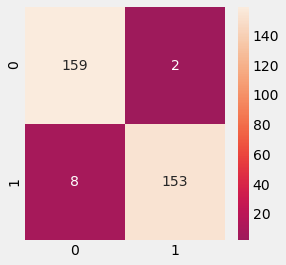

In [43]:
# Confusion Matrix

# Analyze the Performance of Gradient Boosting using Confusion matrix
from sklearn.metrics import confusion_matrix
Conf_Matrix = confusion_matrix(y_test, y_pred_GBC)

plt.style.use('fivethirtyeight')
# Visualize the Confusion Matrix using heatmap
plt.rcParams['figure.figsize'] = (4,4)
sns.heatmap(Conf_Matrix, annot = True, fmt = '.8g',center=30,cmap="rocket")
plt.show()

### **Classification Report**

In [44]:
# Check the Classification report for performance analysis

from sklearn.metrics import  classification_report
Class_Report = classification_report(y_test, y_pred_GBC)
print(Class_Report)

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       161
         1.0       0.99      0.95      0.97       161

    accuracy                           0.97       322
   macro avg       0.97      0.97      0.97       322
weighted avg       0.97      0.97      0.97       322



### **Cross Validation**

In [45]:
# Cross Validation

# import cross validation function
from sklearn.model_selection import cross_val_score

scores = cross_val_score(GBC, x_train, y_train, cv=10)
print(scores)
print('\n Cross-Validation Score :%s '%'{0:.2%}'.format(scores.mean()))

[0.96124031 0.98449612 0.94573643 0.97674419 0.97674419 0.95348837
 0.96875    0.9609375  0.96875    0.96875   ]

 Cross-Validation Score :96.66% 


### **Feature Importance**

In [46]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

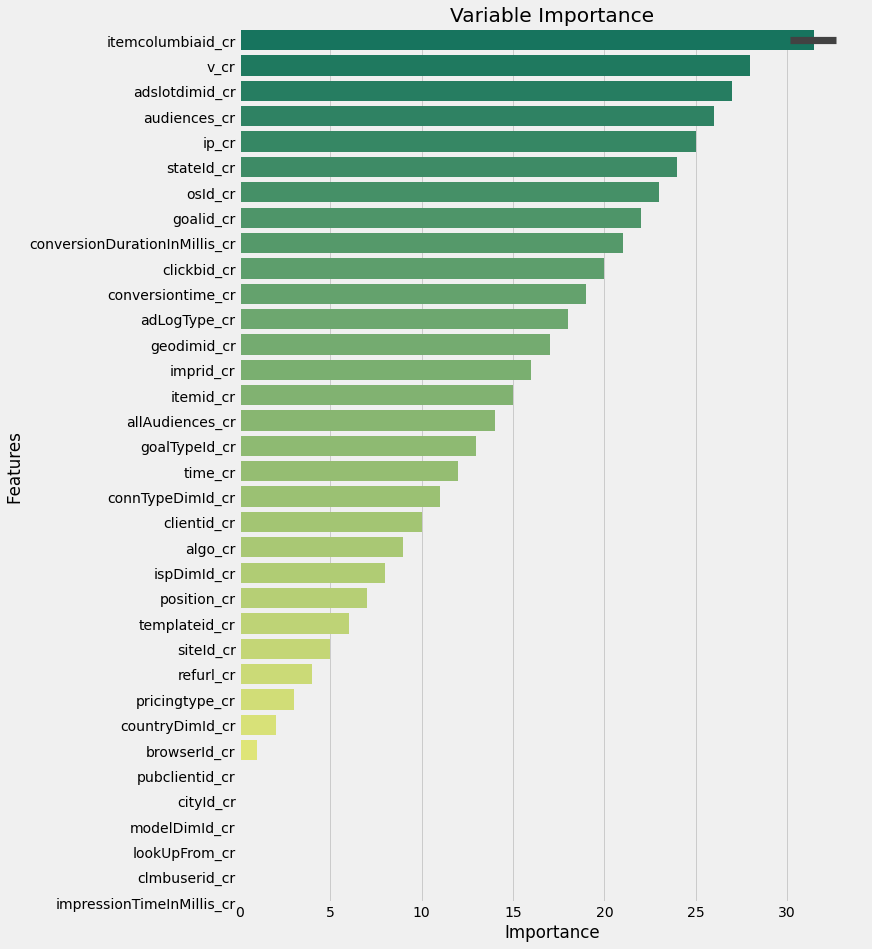

In [47]:
# Get important feature
feature_importance = GBC.feature_importances_

feature_importance = 100*(feature_importance/feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_importance =feature_importance[sorted_idx]
pos = np.arange(sorted_idx.shape[0])

plt.rcParams['figure.figsize'] = (10,15)
sns.barplot(pos,sorted_feature_importance,orient='h', palette= 'summer')
plt.yticks(pos,Data.columns[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Features ")
plt.title('Variable Importance')
plt.show()

In [48]:
# The above plot shows the most important features of the datasets

## **Applying ML Model On Testing Dataset**

In [49]:
Test_Modified.head()


,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,...,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud,Type
934,0.948305,0.0,0.450991,0.001423,0.089820,0.000003,0.960550,0.960560,3.677799e-09,0.031248,...,1.464801e-04,1.0,1.0,0.000000,0.0,0.166667,0.428571,0.4,NaN,0.0
935,0.873346,0.0,0.984079,0.000731,0.104553,0.000000,0.944648,0.766087,1.225933e-09,1.000000,...,8.328189e-07,1.0,1.0,0.551710,0.0,0.000000,0.000000,0.2,NaN,0.0
936,0.873346,0.0,0.984079,0.000654,0.104553,0.000000,0.944360,0.766087,1.225933e-09,1.000000,...,2.188432e-06,1.0,1.0,0.551710,0.0,0.000000,0.000000,0.2,NaN,0.0
937,0.345516,0.0,0.978965,0.000769,0.089820,0.000000,0.997236,0.982921,1.225933e-09,0.000000,...,2.638583e-05,1.0,1.0,0.998301,0.0,0.000000,0.714286,1.0,NaN,0.0
938,0.345516,0.0,0.978965,0.000769,0.089820,0.000000,0.997236,0.982921,1.225933e-09,0.000000,...,2.127261e-05,1.0,1.0,0.998301,0.0,0.000000,0.714286,1.0,NaN,0.0


In [50]:
# predict the converstion fraud for test data set and store it
result= GBC.predict(Test_Modified.drop(['conversion_fraud'],axis=1))

In [51]:
# Convert to pandas DataFrame
result=pd.DataFrame(result,columns={'conversion_fraud'})

In [52]:
result['conversion_fraud'].replace((1,0),(True,False),inplace=True)

In [53]:
# Set Index as Loan_ID which was stored in loan_id earlier
result.set_index(record_id, inplace=True)
# Check the head of result data
result.head()

,conversion_fraud
record_id,
1000,False
1001,True
1002,True
1003,False
1004,False


### **Store the Result**

In [54]:
# Store the Final result
result.to_csv(r'C:Outputs\Result_Submission.csv')